In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from nela_features.nela_features import NELAFeatureExtractor 
from tqdm import tqdm
import re
#https://www.kaggle.com/datasets/emineyetm/fake-news-detection-datasets?resource=download&select=News+_dataset
fake_data=pd.read_csv("dataset/Fake.csv")
real_data=pd.read_csv("dataset/True.csv")
nela = NELAFeatureExtractor()

In [64]:
print(fake_data.columns)

Index(['title', 'text', 'subject', 'date'], dtype='object')


In [65]:
def filter_short(df):
    df["text"] = df.text.astype(str)
    df["WordsCount"]=df["text"].apply(lambda x: len(re.sub('[^a-zA-Z]', ' ', x)))
    df=df[(df["WordsCount"]>= 5)]
    if 'id' in df.columns:
        df = df[df['id'].str.isnumeric()]
    df = df[df['text'].str.isnumeric() == False]
    df = df[df['text'] != None]
    df = df[df['text'] != ' ']
    df = df.drop(["WordsCount"], axis=1)
    return df


fake_data["label"]="fake"
fake_data = filter_short(fake_data)
real_data["label"]="real"
real_data = filter_short(real_data)

real_data = real_data.sample(100)
fake_data = fake_data.sample(100)


final_data= pd.concat([fake_data,real_data])

final_data = final_data.drop(["subject","date"], axis=1)
final_data=final_data[["text","label"]]
final_data['label'] = final_data['label'].map({'real':1, 'fake':0})

In [66]:
data_text=final_data["text"]
data_label=final_data["label"]

In [67]:
print(type(data_text))

<class 'pandas.core.series.Series'>


In [68]:
X_train, X_test, Y_train, Y_test = train_test_split(data_text, data_label, stratify = data_label)

In [69]:
def make_features(data):
    xtrain_nela = []
    for row in tqdm(data):
        bvector,bnames = nela.extract_bias(row)
        cvector,cnames = nela.extract_complexity(row)
        xtrain_nela.append([bvector[0],bvector[6]])
    return xtrain_nela

In [70]:
print(X_train.sample(1))

4281    At the second presidential debate, Donald Trum...
Name: text, dtype: object


In [71]:
"""xtest_nela = []

for row in tqdm(X_test):
    bvector,bnames = nela.extract_affect(row)
    cvector,cnames = nela.extract_complexity(row)
    xtest_nela.append([bvector[10],cvector[3]])"""

'xtest_nela = []\n\nfor row in tqdm(X_test):\n    bvector,bnames = nela.extract_affect(row)\n    cvector,cnames = nela.extract_complexity(row)\n    xtest_nela.append([bvector[10],cvector[3]])'

In [72]:
newsarticle = "hello"

In [73]:
nela.extract_complexity(newsarticle)

([1.0, 5.0, 1, -5.996, 3.0, -16.35, 1.0],
 ['ttr',
  'avg_wordlen',
  'word_count',
  'flesch_kincaid_grade_level',
  'smog_index',
  'coleman_liau_index',
  'lix'])

In [74]:
# didn't work well
nela.extract_bias(newsarticle)

([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 ['bias_words',
  'assertatives',
  'factives',
  'hedges',
  'implicatives',
  'report_verbs',
  'positive_opinion_words',
  'negative_opinion_words'])

In [75]:
nela.extract_affect(newsarticle) 

([0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 ['vadneg',
  'vadneu',
  'vadpos',
  'wneg',
  'wpos',
  'wneu',
  'sneg',
  'spos',
  'sneu'])

In [76]:
nela.extract_moral(newsarticle) 

([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 ['HarmVirtue',
  'HarmVice',
  'FairnessVirtue',
  'FairnessVice',
  'IngroupVirtue',
  'IngroupVice',
  'AuthorityVirtue',
  'AuthorityVice',
  'PurityVirtue',
  'PurityVice',
  'MoralityGeneral'])

In [77]:
nela.extract_event(newsarticle)

([0.0, 0.0], ['num_locations', 'num_dates'])

In [78]:
import mpl_toolkits.mplot3d  # noqa: F401
import numpy as np

from sklearn.cluster import KMeans






def test_clustering(X,y):
    fig = plt.figure(figsize=(10, 8))
    estimators = [
        ("k_means_2", KMeans(n_clusters=2)),
        ("k_means_3", KMeans(n_clusters=3)),
        ("k_means_4", KMeans(n_clusters=4)),
    ]
    fig = plt.figure(figsize=(10, 8))
    titles = ["2 clusters", "3 clusters", "4 clusters"]
    for idx, ((name, est), title) in enumerate(zip(estimators, titles)):
        ax = fig.add_subplot(2, 2, idx + 1)
        est.fit(X)
        labels = est.labels_
        ax.scatter(X[:, 0], X[:, 1], c=labels.astype(float), edgecolor="k")
        ax.xaxis.set_ticklabels([])
        ax.yaxis.set_ticklabels([])
        
        ax.set_xlabel("Feature1")
        ax.set_ylabel("Feature2")
        ax.set_title(title)
    
    # Plot the ground truth
    ax = fig.add_subplot(2,2,4)
    
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k",label=y)
    legend = ax.legend(*scatter.legend_elements(),
                        loc="lower left", title="Classes")
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    
    ax.set_xlabel("Feature1")
    ax.set_ylabel("Feature2")
    
    ax.set_title("Ground Truth")
    
    plt.subplots_adjust(wspace=0.25, hspace=0.25)
    plt.show()

In [79]:
xtrain_nela = make_features(X_train)

100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:05<00:00, 27.19it/s]


<Figure size 1000x800 with 0 Axes>

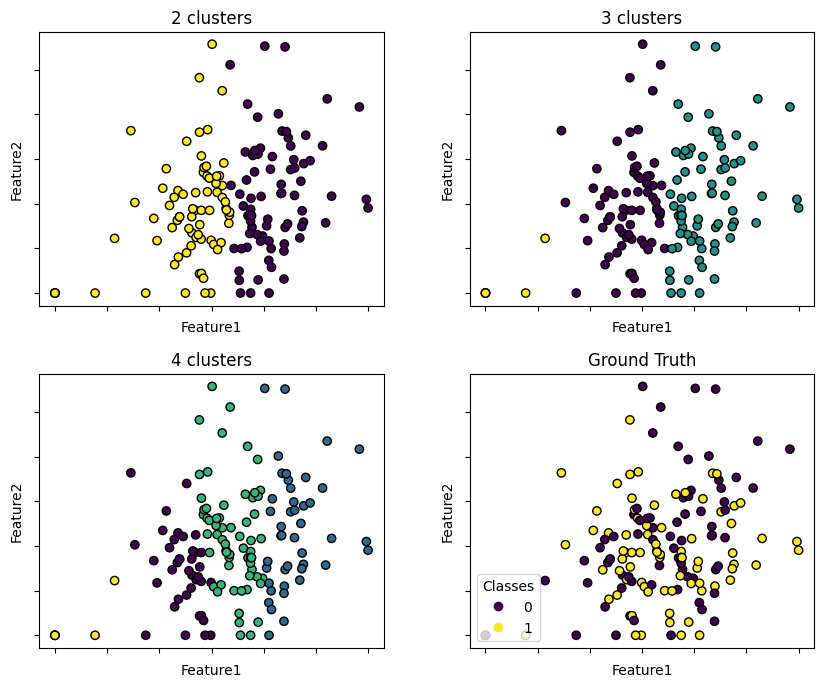

In [80]:
X = np.array(xtrain_nela)
y = np.array(Y_train)
test_clustering(X,y)

In [82]:
data=pd.read_csv("dataset/train.csv")
data = data.dropna()
print(data.columns)
#data = filter_short(data)
data = data.sample(1000)
data=data[["text","label"]]
data_text=data["text"]
data_label=data["label"]
X_train, X_test, Y_train, Y_test = train_test_split(data_text, data_label, stratify = data_label)
data.info()

FileNotFoundError: [Errno 2] No such file or directory: 'dataset/train.csv'

In [ ]:
X = np.array(make_features(X_train))
y = np.array(Y_train)

In [ ]:
test_clustering(X,y)

In [85]:
xtest_nela = make_features(X_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:01<00:00, 28.81it/s]


In [90]:
from sklearn.neighbors import KNeighborsClassifier
for i in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain_nela, Y_train)
    predictions = knn.predict(xtest_nela)
    score = sum(Y_test==predictions)/len(Y_test)
    print(i,score)

1 0.6
2 0.62
3 0.58
4 0.52
5 0.54
6 0.48
7 0.46
8 0.42
9 0.48
10 0.44
11 0.52
12 0.44
13 0.42
14 0.48
